# Stack Overflow Case Study

## Understanding Data

In [ ]:
!pip install tqdm --upgrade

Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.42.0)


In [ ]:
# Import required modules
import pandas as pd
import numpy as np
# Data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read data into dataframes
# Questions asked by users
questions = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv", encoding='latin')

In [ ]:
# Answers to questions asked by users above
answers = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv", encoding='latin')

# The various tags of the questions that are asked
tags = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv", encoding='latin')

# All the users that were present between the mentioned duration
users = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv", encoding='latin')

Now that we have the read the data into dataframes, let's start with the data exploration part.

## Data Overview
Let's start off by having a look at the shape of the data we are dealing with.

In [ ]:
questions.shape

(1264216, 7)

In [ ]:
answers.shape

(2014516, 6)

In [ ]:
tags.shape

(3750994, 2)

In [ ]:
users.shape

(1990480, 9)

The shape of each dataframe is different - the rows and the columns both.

Next, let's have a look at the first 5 rows of each dataframe.

In [ ]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


Note that there are some missing values in the `ClosedDate` column. Also, the `OwnerUserId` column should be an integer but looks like it's in float format. All the dates will also need to be converted to DateTime format.

In [ ]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


Just like the `questions` data, the `OwnerUserId` here should be in Integer format but is in floating point format. The `CreationDate` column will also be converted into DateTime format for easy processing.

In [ ]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


We can see that there are different tags for the same id, which makes sense since a question can have multiple tags. Apart from that, the data at this step looks fine.

In [ ]:
users.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


We can note the followings things for the `users` data:
1. `Unnamed: 0` column needs to be dropped.
2. There are definitely some duplicate rows present in the data. The first 5 rows in this case correspond to the same user - `Shawn`.

Before we can proceed with any kind of data analysis, we will have to first clean up the data based on our observations.

## Data Cleaning and Manipulation

We will take one dataframe at a time, starting off with the `questions` dataframe.

### Questions Dataset

Let's start off by removing any duplicates.

In [ ]:
questions.drop_duplicates(inplace=True)

In [ ]:
# Percentage of missing values
questions.isnull().sum()/len(questions.index) * 100

Id               0.000000
OwnerUserId      1.143317
CreationDate     0.000000
ClosedDate      95.573620
Score            0.000000
Title            0.000000
Body             0.000000
dtype: float64

Note that there are only two columns with missing values - `ClosedDate` and `OwnerUserId`.

Since a huge number of `ClosedDate` values are missing, we can consider dropping the column and replacing it with a boolean variable - `Closed` which will be `1` if the question was closed and `0` otherwise. That way all the missing values will be converted to `0` in `Closed` column.

For the `OwnerUserId`, there is a possibility that we can get that information from `answers` dataframe. If still the information is not found for the samples, we can consider dropping those samples since they are very low in number as compared to the total number of samples present in the dataset.

In [ ]:
def closedDateToBoolean(x):
  """
  This function converts the 
  ClosedDate column to a
  boolean column - Closed
  Input:
  x - ClosedDate value
  Output:
  1 - If x is non-null
  0 - otherwise
  """
  if pd.isnull(x):
    return 0
  else:
    return 1

In [ ]:
# Create the new boolean column - Closed
questions["Closed"] = questions["ClosedDate"].progress_apply(closedDateToBoolean)

In [ ]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Closed
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,0
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,0
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,0


In [ ]:
# Drop ClosedDate column
questions.drop("ClosedDate",axis=1,inplace=True)

In [ ]:
questions.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,0
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,0
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,0


Next, let's have a look at the samples with missing `OwnerUserId`

In [ ]:
questions[questions["OwnerUserId"].isnull()]

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed
47,4170,NaN,2008-08-07T00:25:03Z,9,How to learn ADO.NET,<p>I need to learn ADO.NET to build applicatio...,0
130,12330,NaN,2008-08-15T15:06:31Z,6,Programmatically list WMI classes and their pr...,"<p>Hey everyone, \nIs there any known way of l...",0
158,15190,NaN,2008-08-18T20:32:49Z,2,Changing CURRENT save/default directory in Del...,<p>I have a project group that contains a proj...,0
198,18250,NaN,2008-08-20T15:40:53Z,0,Creation Date of Compiled Executable (VC++ 2005),<p>The creation date of an executable linked i...,0
300,29100,NaN,2008-08-26T22:28:22Z,5,How are you generating tests from specifications?,"<p>I came across a printed <a href=""http://www...",0
...,...,...,...,...,...,...,...
1261359,40076260,NaN,2016-10-16T22:38:59Z,1,How can I find out if two lines overlap?,<p>My function takes two objects that represen...,0
1261501,40079260,NaN,2016-10-10T15:10:51Z,0,"VB6.0 ""Run - time error '3709': The connection...","<p><a href=""http://i.stack.imgur.com/M2EV8.png...",0
1263664,40130890,NaN,2016-10-19T12:02:24Z,-4,How would i change my program so that the colo...,"<p><div class=""snippet"" data-lang=""js"" data-hi...",1
1263908,40136590,NaN,2016-10-19T13:24:10Z,0,Names of variables inside the 'for loop',<p>In <strong>my_data</strong> I want to creat...,1


In [ ]:
# Ids of questions with missing OwnerUserId
missingIds = questions[questions["OwnerUserId"].isnull()].Id.values

Let's quickly check if these ids have a `OwnerUserId` in `answers` dataframe.

In [ ]:
# Display samples with Id same as the missing id
answers[answers["Id"].isin(missingIds)]

,Id,OwnerUserId,CreationDate,ParentId,Score,Body


As we can see, there is no information present for the missing ids in the `answers` dataframe. In such a situation, we can remove the missing id samples for now.

In [ ]:
questions = questions[~questions["OwnerUserId"].isnull()]

In [ ]:
# Check the missing values percentage
questions.isnull().sum()/len(questions.index) * 100

Id              0.0
OwnerUserId     0.0
CreationDate    0.0
Score           0.0
Title           0.0
Body            0.0
Closed          0.0
dtype: float64

Now that there are no more missing values, let's have a look at the datatypes of the columns.

In [ ]:
# Check the datatype of the columns
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
Id              1249762 non-null int64
OwnerUserId     1249762 non-null float64
CreationDate    1249762 non-null object
Score           1249762 non-null int64
Title           1249762 non-null object
Body            1249762 non-null object
Closed          1249762 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 76.3+ MB


There are two columns which need datatype conversion here:
1. `OwnerUserId` should be an Integer.
2. `CreationDate` should be a DateTime object.

In [ ]:
# Convert OwnerUserId to Integer
questions["OwnerUserId"] = questions["OwnerUserId"].astype("int64")

In [ ]:
# Convert CreationDate to DateTime
questions["CreationDate"] = pd.to_datetime(questions["CreationDate"])

In [ ]:
# Check first 5 rows
questions.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1
2,120,83,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,0
3,180,2089740,2008-08-01 18:42:19+00:00,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,0
4,260,91,2008-08-01 23:22:08+00:00,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,0


In [ ]:
# Check the datatypes
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
Id              1249762 non-null int64
OwnerUserId     1249762 non-null int64
CreationDate    1249762 non-null datetime64[ns, UTC]
Score           1249762 non-null int64
Title           1249762 non-null object
Body            1249762 non-null object
Closed          1249762 non-null int64
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 76.3+ MB


Notice that the datatypes have now been corrected.

Next, let's have a look at the columns which we can standardize.

In [ ]:
questions.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1
2,120,83,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,0
3,180,2089740,2008-08-01 18:42:19+00:00,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,0
4,260,91,2008-08-01 23:22:08+00:00,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,0


Now that we have cleaned `questions` dataset, let's move on to `answers` dataset.

### Answers Dataset

Let's start off by checking the percentage of missing values. But before that, let's first remove the duplicates (if any).

In [ ]:
answers.drop_duplicates(inplace=True)

In [ ]:
answers.isnull().sum()/len(answers.index) * 100

Id              0.000000
OwnerUserId     0.655244
CreationDate    0.000000
ParentId        0.000000
Score           0.000000
Body            0.000000
dtype: float64

As we can see, there is 0.65% values missing for `OwnerUserId` column. Since the number is very small, we can remove those samples.

In [ ]:
answers = answers[~answers["OwnerUserId"].isnull()]

In [ ]:
# Check the percentage of missing values again
answers.isnull().sum()/len(answers.index) * 100

Id              0.0
OwnerUserId     0.0
CreationDate    0.0
ParentId        0.0
Score           0.0
Body            0.0
dtype: float64

Next, let's check the datatypes of the columns.

In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 6 columns):
Id              int64
OwnerUserId     float64
CreationDate    object
ParentId        int64
Score           int64
Body            object
dtypes: float64(1), int64(3), object(2)
memory usage: 106.9+ MB


Let's convert `OwnerUserId` to Integer and `CreationDate` to DateTime object.

In [ ]:
# Convert OwnerUserId to Integer
answers["OwnerUserId"] = answers["OwnerUserId"].astype("int64")

In [ ]:
# Convert CreationDate to DateTime
answers["CreationDate"] = pd.to_datetime(answers["CreationDate"])

In [ ]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


### Tags Dataset

In [ ]:
# Drop duplicates
tags.drop_duplicates(inplace=True)

In [ ]:
# Percentage of missing values
tags.isnull().sum()/len(tags.index)*100

Id     0.000000
Tag    0.029645
dtype: float64

We can introduce a new column to check whether a tag was present or not for a question. We will also replace the null values for tags with `""`.

In [ ]:
def tagToTagPresence(x):
  """
  This function checks whether
  a tag was provided for a
  question or not
  Input:
  x - Tag value
  Output:
  1 - If x is non-null
  0 - otherwise
  """
  if pd.isnull(x):
    return 0
  else:
    return 1

In [ ]:
tags["Tag_present"] = tags["Tag"].progress_apply(tagToTagPresence)

In [ ]:
# Replace null values in tags with ""
tags["Tag"] = tags["Tag"].fillna("")

In [ ]:
# Percentage of missing values
tags.isnull().sum()/len(tags.index)*100

Id             0.0
Tag            0.0
Tag_present    0.0
dtype: float64

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750993 entries, 0 to 3750993
Data columns (total 3 columns):
Id             int64
Tag            object
Tag_present    int64
dtypes: int64(2), object(1)
memory usage: 114.5+ MB


As we can see, both columns already have the correct datatype.

In [ ]:
tags["Tag"].str.lower().nunique()

37035

The number of unique tags is huge otherwise we could have used it as well to find out top 5 correlated tags for each tag.

### Users Dataset

In [ ]:
# Percentage of missing values
users.isnull().sum()/len(users.index) * 100

Unnamed: 0          0.000000
id                  0.000000
display_name        0.006833
creation_date       0.000000
last_access_date    0.000000
reputation          0.000000
up_votes            0.000000
down_votes          0.000000
views               0.000000
dtype: float64

Let's start off by removing the `Unnamed: 0` column.

In [ ]:
users.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# Drop duplicates
users.drop_duplicates(inplace=True)

`users` dataframe has some missing values in `display_name`. Let's investigate those.

In [ ]:
users[users["display_name"].isnull()]

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
129535,25411,NaN,2008-10-06 07:27:24.897 UTC,2018-01-14 16:29:00.133 UTC,5933,46,4,474
385210,98324,NaN,2009-04-30 07:37:08.027 UTC,2010-08-18 08:00:46.337 UTC,109,0,0,70
627042,75777,NaN,2009-03-09 18:51:49.727 UTC,2018-10-14 02:23:03.763 UTC,2093,31,1,151
690714,428789,NaN,2010-08-23 20:04:56.363 UTC,2019-08-30 14:34:24.577 UTC,9105,247,20,481
938603,844005,NaN,2011-07-14 06:55:45.213 UTC,2019-01-09 13:25:16.583 UTC,3845,515,16,359
986745,1262634,NaN,2012-03-11 17:44:35.57 UTC,2019-09-01 04:59:37.95 UTC,17892,632,306,1223
1103009,248055,NaN,2010-01-11 13:03:36.443 UTC,2019-08-27 11:13:30.147 UTC,7380,257,9,476
1147730,2060669,NaN,2013-02-11 08:36:52.81 UTC,2019-08-30 07:41:01.41 UTC,1052,307,3,64
1358831,2036285,NaN,2013-02-03 00:34:38.88 UTC,2019-08-31 19:32:20.863 UTC,1780,37,5,148
1381529,2128970,NaN,2013-03-03 14:14:33.263 UTC,2019-08-31 22:23:08.713 UTC,450,73,16,58


We can replace such `display_name` with `""`

In [ ]:
users["display_name"] = users["display_name"].fillna("")

In [ ]:
# Percentage of missing values
users.isnull().sum()/len(users.index) * 100

id                  0.0
display_name        0.0
creation_date       0.0
last_access_date    0.0
reputation          0.0
up_votes            0.0
down_votes          0.0
views               0.0
dtype: float64

Let's now have a look at the datatypes.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 8 columns):
id                  465460 non-null int64
display_name        465460 non-null object
creation_date       465460 non-null object
last_access_date    465460 non-null object
reputation          465460 non-null int64
up_votes            465460 non-null int64
down_votes          465460 non-null int64
views               465460 non-null int64
dtypes: int64(5), object(3)
memory usage: 32.0+ MB


We can convert `creation_date` and `last_access_date` to DateTime objects.

In [ ]:
users["creation_date"] = pd.to_datetime(users["creation_date"])

In [ ]:
users["last_access_date"] = pd.to_datetime(users["last_access_date"])

In [ ]:
# Check the datatype
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 8 columns):
id                  465460 non-null int64
display_name        465460 non-null object
creation_date       465460 non-null datetime64[ns, UTC]
last_access_date    465460 non-null datetime64[ns, UTC]
reputation          465460 non-null int64
up_votes            465460 non-null int64
down_votes          465460 non-null int64
views               465460 non-null int64
dtypes: datetime64[ns, UTC](2), int64(5), object(1)
memory usage: 32.0+ MB


The rest of the datatypes are already correct.

**Merging the dataset** - While we can merge the datasets at this step, it will end up increasing the dataset size multifolds. That's why, for now, we will use the datasets as they are and merge them if required.

## Standardizing Data

### Questions Dataset

In [ ]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
Id              1249762 non-null int64
OwnerUserId     1249762 non-null int64
CreationDate    1249762 non-null datetime64[ns, UTC]
Score           1249762 non-null int64
Title           1249762 non-null object
Body            1249762 non-null object
Closed          1249762 non-null int64
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 76.3+ MB


In [ ]:
# Columns that we can standardize
colsToStandardize = ["Score"]

In [ ]:
# Function for standardizing columns
def standardizeColumns(columns,df):
  for col in columns:
    # Create a new standardized column
    # to keep the original column untouched
    df["{}_std".format(col)] = (df[col]-df[col].mean())/df[col].std()
  
  return df

In [ ]:
questions = standardizeColumns(colsToStandardize,questions)

### Answers Dataset

In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 6 columns):
Id              int64
OwnerUserId     int64
CreationDate    datetime64[ns, UTC]
ParentId        int64
Score           int64
Body            object
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 106.9+ MB


In [ ]:
# Columns to standardize
colsToStandardize = ["Score"]

# Standardize
answers = standardizeColumns(colsToStandardize, answers)

### Tags Dataset

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750993 entries, 0 to 3750993
Data columns (total 3 columns):
Id             int64
Tag            object
Tag_present    int64
dtypes: int64(2), object(1)
memory usage: 114.5+ MB


There is no column to standardize here.

### Users Dataset

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 8 columns):
id                  465460 non-null int64
display_name        465460 non-null object
creation_date       465460 non-null datetime64[ns, UTC]
last_access_date    465460 non-null datetime64[ns, UTC]
reputation          465460 non-null int64
up_votes            465460 non-null int64
down_votes          465460 non-null int64
views               465460 non-null int64
dtypes: datetime64[ns, UTC](2), int64(5), object(1)
memory usage: 32.0+ MB


In [ ]:
colsToStandardize = ["reputation",
                     "up_votes",
                     "down_votes",
                     "views"]

# Standardize columns
users = standardizeColumns(colsToStandardize, users)

## Feature Engineering

We will perform feature engineering in multiple steps. First, we will add some obvious features that have the potential of providing additional information related to the tasks. Later on, we can provide further feature engineering based on the EDA results.

### Time required to obtain answer

This feature directly relates to the second task:

> When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

Instead of incorporating the tags component right now, we will create a new feature that gives the time required to obtain an answer.

This can be thought of as the following:

$$\text{Time to answer} = \text{Question creation time} - \text{min(Answer creation time)}$$

We already have the question creation time so we will create a function to obtain min(answer creation time) and add it as a column to the questions dataset. Subtracting the question creation time and min(answer creation time) will give the time to answer.

In [ ]:
questions.head(1)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed,Score_std
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833


In [ ]:
questions.shape

(1249762, 8)

In [ ]:
# Minimum Creation Dates for answers
minCreationDates = answers.groupby("ParentId")['CreationDate'].min()

In [ ]:
def minAnswerCreationTime(questionIndex):
  # Return the timestamp of the answer with minimum creation date
  # corresponding to the same question
  try:
    # Try to return the value
    return minCreationDates[questionIndex]
  except:
    # If no answer was given, return 19-10-2016 as default
    return pd.Timestamp('20161019',tz="UTC")

In [ ]:
questions["minAnswerCreationTime"] = questions["Id"].progress_apply(minAnswerCreationTime)

In [ ]:
# Time required to obtain answer
questions["timeToAnswer"] = questions["minAnswerCreationTime"] - questions["CreationDate"]

In [ ]:
# We will convert the timeToAnswer into hours
questions["timeToAnswer"] = questions["timeToAnswer"].dt.components['days']*24 + \
          questions["timeToAnswer"].dt.components['hours'] + \
          questions["timeToAnswer"].dt.components['minutes']/60 + \
          questions["timeToAnswer"].dt.components['seconds']/3600

In [ ]:
# Since this is a numerical variable
# standardize this column
questions = standardizeColumns(["timeToAnswer"],questions)

In [ ]:
questions.head(1)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed,Score_std,minAnswerCreationTime,timeToAnswer,timeToAnswer_std
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692


### DataScience Tag Presence

Since we are going to focus extensively on Data Science tags ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), let's create a new column which tells whether a data science tag is present or not in a question.

In [ ]:
# Data Science tag check in tags dataframe
tags['DataScience'] = tags['Tag'].progress_apply(lambda x:1 if x in ['python','r','matlab','sas','excel','sql'] else 0)

In [ ]:
dataScienceTags = tags.groupby("Id")["DataScience"].max()
questions["DS_Tag"] = questions["Id"].progress_apply(lambda x:dataScienceTags[x])

We will also need to check if a certain question had a specific data science tag or not. For this, we can create 6 additional columns in the questions dataframe each telling whether a data science tag is present or not.

First, we will create those columns in tags dataframe.

In [ ]:
for dstag in ['python','r','matlab','sas','excel','sql']:
  tags[dstag] = tags['Tag'].progress_apply(lambda x:1 if x==dstag else 0)

In [ ]:
for dstag in ['python','r','matlab','sas','excel','sql']:
  # Maximum DataScience Tag check for each tag
  dsGroupby = tags.groupby("Id")[dstag].max()
  questions[dstag] = questions["Id"].progress_apply(lambda x: dsGroupby[x])

In [ ]:
questions.head(2)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed,Score_std,minAnswerCreationTime,timeToAnswer,timeToAnswer_std,DS_Tag,python,r,matlab,sas,excel,sql
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1,10.418332,2008-08-01 14:45:37+00:00,0.070278,-0.313000,0,0,0,0,0,0,0


### Title & Body Length

So far, we have taken into account about all the attributes except the Body and Title of the question. Let's create a new column in questions dataframe which tells the length of the title and the body.

In [ ]:
questions["Title_length"] = questions["Title"].str.len()

In [ ]:
questions["Body_length"] = questions["Body"].str.len()

In [ ]:
questions.head(1)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed,Score_std,minAnswerCreationTime,timeToAnswer,timeToAnswer_std,DS_Tag,python,r,matlab,sas,excel,sql,Title_length,Body_length
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941


In [ ]:
# Title_length and Body_length are numerical attributes
# Let's standardize them
questions = standardizeColumns(["Title_length","Body_length"],questions)

### Code in Question Body

Typically when posting questions on Stack Overflow, it's a recommended practice to put your code along with the question. 

Code in stackoverflow is written using `<code>` tag. So we will check for its presence in the body of the question.

In [ ]:
questions["Code"] = questions["Body"].str.contains("<code>").progress_apply(lambda x:1 if x else 0)

In [ ]:
questions.head(1)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed,Score_std,minAnswerCreationTime,timeToAnswer,timeToAnswer_std,DS_Tag,python,r,matlab,sas,excel,sql,Title_length,Body_length,Title_length_std,Body_length_std,Code
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1


### Number of Tags

Another important feature to analyse is the number of tags present in a question.

In [ ]:
# Number of tags for each question
numTags = tags.groupby("Id").count()["Tag"]

In [ ]:
questions["Num_Tags"] = questions["Id"].progress_apply(lambda x:numTags[x])

In [ ]:
questions.head(1)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Closed,Score_std,minAnswerCreationTime,timeToAnswer,timeToAnswer_std,DS_Tag,python,r,matlab,sas,excel,sql,Title_length,Body_length,Title_length_std,Body_length_std,Code,Num_Tags
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,0,1.774833,2008-08-01 16:09:47+00:00,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3


Similarly, we will also create a Tag Presence column in questions dataframe.

In [ ]:
questionTags = tags.groupby("Id")["Tag_present"].max()
questions["Tag_present"] = questions["Id"].progress_apply(lambda x:questionTags[x])

### Time based activity

As the final feature engineering step, we will add certain features based on the creation time of questions and answers and drop the original questions/answers timestamps as they do not convey much information.

We will extract the following information:
1. Date of the month
2. Month
3. Year
4. Hour
5. Day of the week

In [ ]:
def timeBasedActivity(df, col):
  # Extract hour
  df["{}_hr".format(col)] = df[col].dt.hour
  # Extract week day
  df["{}_day".format(col)] = df[col].dt.day_name()
  # Extract month
  df["{}_month".format(col)] = df[col].dt.month
  # Extract year
  df["{}_year".format(col)] = df[col].dt.year
  # Extract date of the month
  df["{}_date".format(col)] = df[col].dt.day
  # Return revised dataframe
  return df

In [ ]:
# We will carry out this analysis only on questions and answers dataframes
questions = timeBasedActivity(questions,"CreationDate")

In [ ]:
answers = timeBasedActivity(answers, "CreationDate")

### Users Activity

We will create one more feature denoting whether a user was active in the year 2019. This is important because if we are going to send notifications to inactive users to answer a question, it won't be useful at all.

In [ ]:
def activeLastYear(x):
  # Check the year
  if x.year == 2019:
    return 1
  else:
    return 0

In [ ]:
users["ActiveLastYear"] = users["last_access_date"].progress_apply(activeLastYear)

### Number of answers

Let's add one more column to `questions` dataset which tells the number of answers received to a question.

In [ ]:
# group answers based on question id
questions_answers = answers.groupby("ParentId").count()["Id"]

In [ ]:
def addNumberOfAnswers(x):

  try:
    # Try to return number of answers
    return questions_answers[x]
  except:
    # If no answers found
    return 0

In [ ]:
# Add a column about number of answers
questions["Num_answers"] = questions["Id"].progress_apply(addNumberOfAnswers)

In [ ]:
# Check the range of number of answers
questions["Num_answers"].describe()

count    1.249762e+06
mean     1.576975e+00
std      1.475294e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.840000e+02
Name: Num_answers, dtype: float64

Since the range of number of answers is quite wide, we can take number of answers as a numerical variable rather than a categorical variable. Thus, we will standardize it.

In [ ]:
questions = standardizeColumns(["Num_answers"],questions)

## Data Cleaning

Since we have added some new features, let's remove some columns which are no longer required or redundant

### Questions Dataset

In [ ]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 32 columns):
Id                       1249762 non-null int64
OwnerUserId              1249762 non-null int64
CreationDate             1249762 non-null datetime64[ns, UTC]
Score                    1249762 non-null int64
Title                    1249762 non-null object
Body                     1249762 non-null object
Closed                   1249762 non-null int64
Score_std                1249762 non-null float64
minAnswerCreationTime    1249762 non-null datetime64[ns, UTC]
timeToAnswer             1249762 non-null float64
timeToAnswer_std         1249762 non-null float64
DS_Tag                   1249762 non-null int64
python                   1249762 non-null int64
r                        1249762 non-null int64
matlab                   1249762 non-null int64
sas                      1249762 non-null int64
excel                    1249762 non-null int64
sql                      1249762 no

In [ ]:
# Remove the columns which are no longer required
colsNotRequired = ["Title",
                   "Body",
                   "CreationDate",
                   "minAnswerCreationTime"]
questions.drop(colsNotRequired,axis=1,inplace=True)

### Answers Dataset

In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 12 columns):
Id                    int64
OwnerUserId           int64
CreationDate          datetime64[ns, UTC]
ParentId              int64
Score                 int64
Body                  object
Score_std             float64
CreationDate_hr       int64
CreationDate_day      object
CreationDate_month    int64
CreationDate_year     int64
CreationDate_date     int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(8), object(2)
memory usage: 198.5+ MB


In [ ]:
# Remove the columns which are no longer required
colsNotRequired = ["Body",
                   "CreationDate"]
answers.drop(colsNotRequired,axis=1,inplace=True)

### Tags Dataset

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750993 entries, 0 to 3750993
Data columns (total 10 columns):
Id             int64
Tag            object
Tag_present    int64
DataScience    int64
python         int64
r              int64
matlab         int64
sas            int64
excel          int64
sql            int64
dtypes: int64(9), object(1)
memory usage: 314.8+ MB


In [ ]:
# Remove the columns which are no longer required
colsNotRequired = ["python",
                   "r",
                   "matlab",
                   "sas",
                   "sql",
                   "excel",
                   "Tag_present",
                   "DataScience"]
tags.drop(colsNotRequired,axis=1,inplace=True)

### Users Dataset

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 13 columns):
id                  465460 non-null int64
display_name        465460 non-null object
creation_date       465460 non-null datetime64[ns, UTC]
last_access_date    465460 non-null datetime64[ns, UTC]
reputation          465460 non-null int64
up_votes            465460 non-null int64
down_votes          465460 non-null int64
views               465460 non-null int64
reputation_std      465460 non-null float64
up_votes_std        465460 non-null float64
down_votes_std      465460 non-null float64
views_std           465460 non-null float64
ActiveLastYear      465460 non-null int64
dtypes: datetime64[ns, UTC](2), float64(4), int64(6), object(1)
memory usage: 49.7+ MB


In [ ]:
# Remove the columns which are no longer required
colsNotRequired = ["creation_date"]
users.drop(colsNotRequired,axis=1,inplace=True)

We also know that reputation already takes into account the up votes and down votes, so we can drop those columns as well.

In [ ]:
# Remove the columns which are no longer required
colsNotRequired = ["up_votes","up_votes_std","down_votes","down_votes_std"]
users.drop(colsNotRequired,axis=1,inplace=True)

## Univariate Analysis

Let's start with going over each column and understanding the distribution and carry out univariate analysis.

We can divide the variables broadly into numerical and categorical attributes. We will write a couple of functions for univariate analysis on numerical and categorical attributes.

In [ ]:
def univariateNumerical(df,col,name=None):
  """
  This function carries out univariate
  analysis for numerical attributes.
  Input:
  - df : DataFrame
  - col : This is the column name
  - name: Description of col
  """
  # If name has not been provided
  # use column name
  if name == None:
    name = col
  # Overview
  print("UNIVARIATE ANALYSIS OF {}".format(name))
  print("Description:")
  print(df[col].describe())

  # Boxplot
  plt.title("Boxplot for {}".format(name))
  sns.boxplot(df[col])
  plt.xlabel(name)
  plt.show()

  # Distplot
  plt.title("Distplot for {}".format(name))
  sns.distplot(df[col])
  plt.xlabel(name)
  plt.show()

In [ ]:
def univariateCategorical(df, col, name=None, limit=5):
  """
  This function is responsible
  for carrying out univariate
  analysis on categorical
  variables.
  Input:
  - col - Column name of categorical variable
  - df - DataFrame
  - name - description of col
  - limit - number of top categories to display
  """
  # Use default name as column name
  if name == None:
    name = col
  # Value counts
  print(df[col].value_counts(normalize=True))
  # Countplot
  plt.title("Count plot for {}".format(name))
  # Display only top "limit" categories
  sns.countplot(df[col],
                order=df[col].value_counts().iloc[:limit].index)
  plt.xlabel(name)
  plt.show()

### Questions Dataset

In [ ]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 28 columns):
Id                    1249762 non-null int64
OwnerUserId           1249762 non-null int64
Score                 1249762 non-null int64
Closed                1249762 non-null int64
Score_std             1249762 non-null float64
timeToAnswer          1249762 non-null float64
timeToAnswer_std      1249762 non-null float64
DS_Tag                1249762 non-null int64
python                1249762 non-null int64
r                     1249762 non-null int64
matlab                1249762 non-null int64
sas                   1249762 non-null int64
excel                 1249762 non-null int64
sql                   1249762 non-null int64
Title_length          1249762 non-null int64
Body_length           1249762 non-null int64
Title_length_std      1249762 non-null float64
Body_length_std       1249762 non-null float64
Code                  1249762 non-null int64
Num_Tags              

#### Numerical Variables

UNIVARIATE ANALYSIS OF Question Score
Description:
count    1.249762e+06
mean     1.770194e+00
std      1.365188e+01
min     -7.300000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.190000e+03
Name: Score, dtype: float64


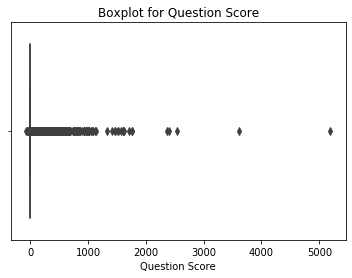

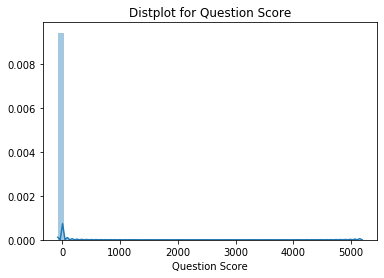

UNIVARIATE ANALYSIS OF Time required to answer
Description:
count    1.249762e+06
mean     2.168964e+03
std      6.929364e+03
min     -3.189654e+04
25%      1.366667e-01
50%      6.658333e-01
75%      2.393528e+01
max      7.158323e+04
Name: timeToAnswer, dtype: float64


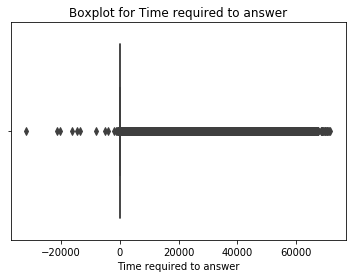

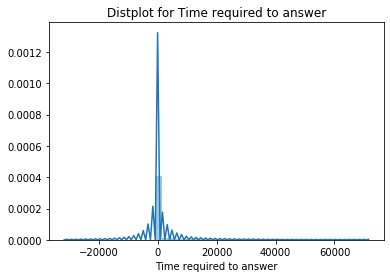

UNIVARIATE ANALYSIS OF Length of the title
Description:
count    1.249762e+06
mean     5.176196e+01
std      1.980730e+01
min      9.000000e+00
25%      3.700000e+01
50%      4.900000e+01
75%      6.300000e+01
max      1.890000e+02
Name: Title_length, dtype: float64


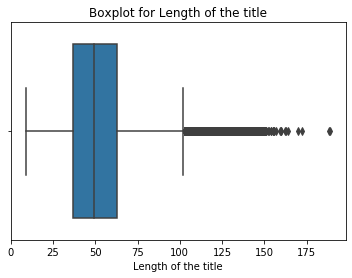

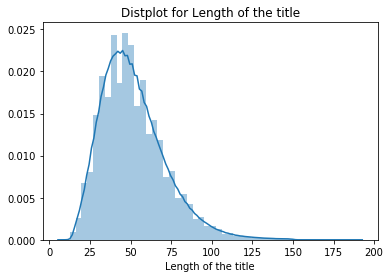

UNIVARIATE ANALYSIS OF Length of the body
Description:
count    1.249762e+06
mean     1.412751e+03
std      1.871382e+03
min      1.800000e+01
25%      5.160000e+02
50%      8.970000e+02
75%      1.603000e+03
max      4.648900e+04
Name: Body_length, dtype: float64


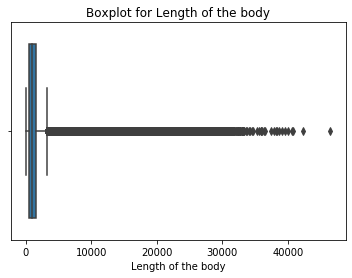

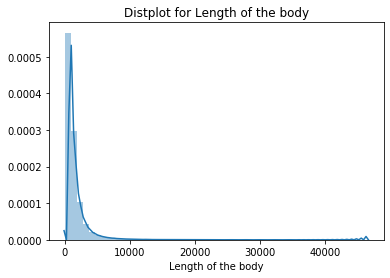

In [ ]:
# Numerical Variables
# Use non-std columns for univariate analysis
numericalVariables = {"Score":"Question Score",
                      "timeToAnswer":"Time required to answer",
                      "Title_length":"Length of the title",
                      "Body_length":"Length of the body"}

for col,name in numericalVariables.items():
  univariateNumerical(questions,col,name)

#### Analysis

**Question Score**

Most questions (75% quantile) have 0 score whereas a very few questions have very low score (min: -73) and very high score (max: 5190)

The distribution is highly right skewed.

**Time required to answer**

Most questions are answered within the first 24 hours (1 day) since the question was posted. There are some negative values as well, which can be because the question was updated after the first answer. This is seen frequently on stackoverflow when a user asks for a clarification in the question.

Again, the distribution is right skewed as some questions take a very long time to receive an answer, sometimes even more than a year.

**Length of the title**

Most questions have title length less than 65 characters. The data is right skewed as some questions can have very long titles (not recommended though). Average length of the title is around 52 characters.

**Length of the body**

Questions have a body length ranging between 18 characters to as high as 46K characters. Most questions have a body length between 500 characters to 1500 characters. The data is right skewed as some questions have very long body.

#### Categorical Variables

In [ ]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 28 columns):
Id                    1249762 non-null int64
OwnerUserId           1249762 non-null int64
Score                 1249762 non-null int64
Closed                1249762 non-null int64
Score_std             1249762 non-null float64
timeToAnswer          1249762 non-null float64
timeToAnswer_std      1249762 non-null float64
DS_Tag                1249762 non-null int64
python                1249762 non-null int64
r                     1249762 non-null int64
matlab                1249762 non-null int64
sas                   1249762 non-null int64
excel                 1249762 non-null int64
sql                   1249762 non-null int64
Title_length          1249762 non-null int64
Body_length           1249762 non-null int64
Title_length_std      1249762 non-null float64
Body_length_std       1249762 non-null float64
Code                  1249762 non-null int64
Num_Tags              

0    0.9558
1    0.0442
Name: Closed, dtype: float64


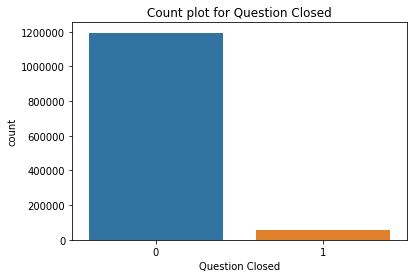

0    0.948834
1    0.051166
Name: python, dtype: float64


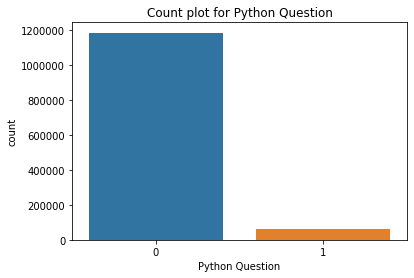

0    0.98751
1    0.01249
Name: r, dtype: float64


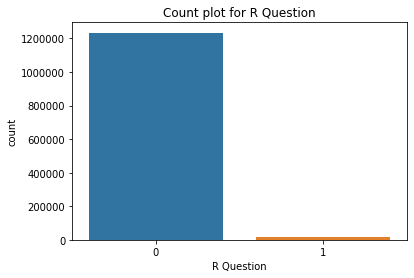

0    0.994846
1    0.005154
Name: matlab, dtype: float64


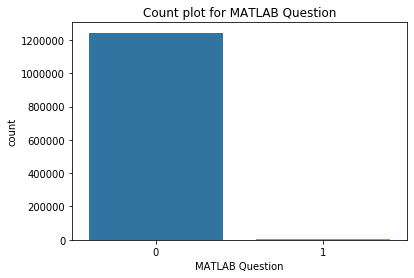

0    0.999448
1    0.000552
Name: sas, dtype: float64


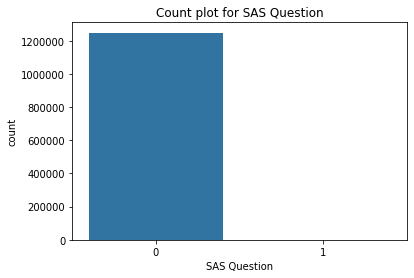

0    0.991768
1    0.008232
Name: excel, dtype: float64


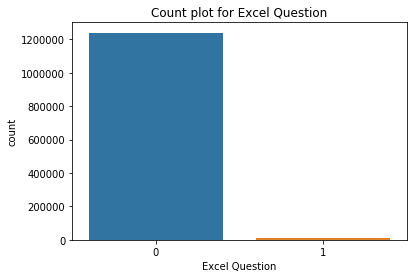

0    0.971749
1    0.028251
Name: sql, dtype: float64


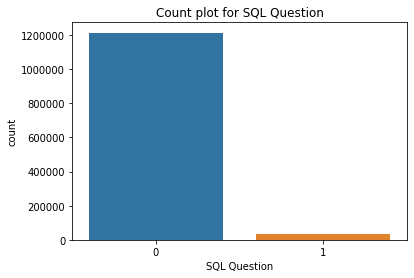

1    0.739737
0    0.260263
Name: Code, dtype: float64


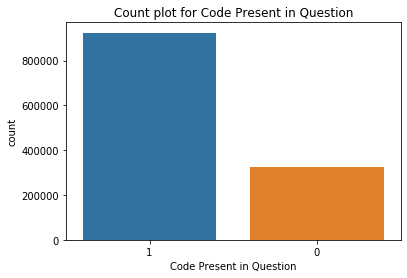

3    0.290939
2    0.258184
4    0.201282
5    0.131213
1    0.118382
Name: Num_Tags, dtype: float64


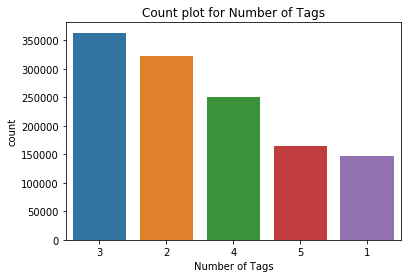

0    0.895412
1    0.104588
Name: DS_Tag, dtype: float64


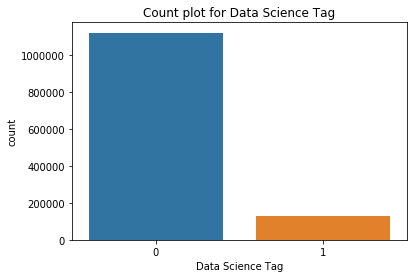

1    0.999998
0    0.000002
Name: Tag_present, dtype: float64


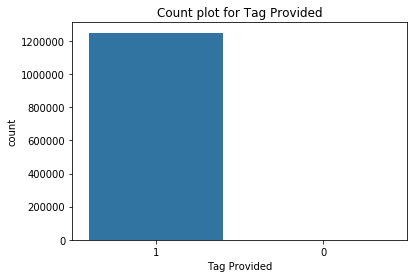

In [ ]:
# Categorical Variables
categoricalVariables = {"Closed":"Question Closed",
                      "python":"Python Question",
                      "r":"R Question",
                      "matlab":"MATLAB Question",
                      "sas":"SAS Question",
                      "excel":"Excel Question",
                      "sql":"SQL Question",
                      "Code":"Code Present in Question",
                      "Num_Tags":"Number of Tags",
                      "DS_Tag":"Data Science Tag",
                      "Tag_present":"Tag Provided"}

for col,name in categoricalVariables.items():
  univariateCategorical(questions,col,name,limit=5)

#### Analysis

**Tag Provided**

Most questions have a tag present so we can ignore this variable in future analysis. **This can serve as a good suggestion to provide to the user.**

**Data Science Tag**

Since we are going to analyse Data Science questions later on, it's important to understand the sample size. Only about 10.5% of the questions asked had at least one of the 6 data science tags present.

**Number of Tags**

Most questions had 3 or 4 tags present. **This can serve as a good suggestion to provide to the user.**

**Code Present in the Question**

Around 26% of the questions had some code present in the questions. This is a really good practice when asking questions regarding a code. Further analysis should be able to verify the same.

**Closed Questions**

Only abour 4% of the questions were closed. This can be because of multiple reasons - duplicate question, question not following the guidelines set by stack overflow, huge number and variety of answers, etc. But since the number is very slow, we can ignore this in further analysis.

**Data Science Tags**

Of the 6 Data Science tags, maximum questions were asked from Python whereas a very few questions were asked from SAS. R and SQL also had a good number of questions.

#### DateTime Variables

While we can consider the variables such as hour, day, etc. as categorical variables, it's better to separate them to carry out an analysis based on time.

In [ ]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 28 columns):
Id                    1249762 non-null int64
OwnerUserId           1249762 non-null int64
Score                 1249762 non-null int64
Closed                1249762 non-null int64
Score_std             1249762 non-null float64
timeToAnswer          1249762 non-null float64
timeToAnswer_std      1249762 non-null float64
DS_Tag                1249762 non-null int64
python                1249762 non-null int64
r                     1249762 non-null int64
matlab                1249762 non-null int64
sas                   1249762 non-null int64
excel                 1249762 non-null int64
sql                   1249762 non-null int64
Title_length          1249762 non-null int64
Body_length           1249762 non-null int64
Title_length_std      1249762 non-null float64
Body_length_std       1249762 non-null float64
Code                  1249762 non-null int64
Num_Tags              

2015    0.182708
2014    0.172510
2016    0.168158
2013    0.163803
2012    0.131859
2011    0.095981
2010    0.055867
2009    0.024875
2008    0.004240
Name: CreationDate_year, dtype: float64


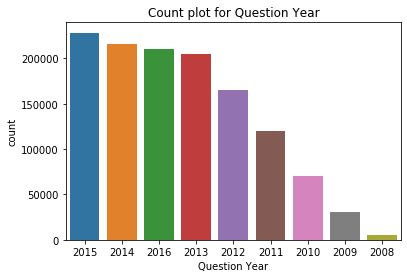

3     0.089926
7     0.088629
4     0.087544
8     0.087173
10    0.086286
5     0.086099
9     0.085631
6     0.084126
2     0.080400
1     0.078749
11    0.074686
12    0.070752
Name: CreationDate_month, dtype: float64


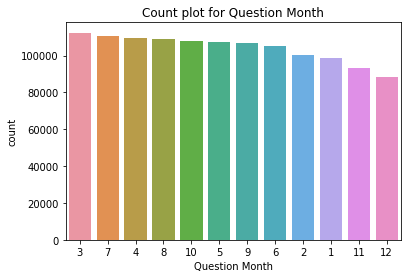

Wednesday    0.175313
Thursday     0.172493
Tuesday      0.171524
Monday       0.157256
Friday       0.154373
Sunday       0.084596
Saturday     0.084445
Name: CreationDate_day, dtype: float64


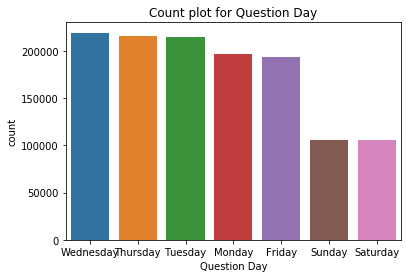

19    0.034368
18    0.034204
11    0.034095
17    0.033860
12    0.033614
22    0.033536
9     0.033499
10    0.033493
8     0.033382
13    0.033262
4     0.033239
16    0.033157
20    0.033084
7     0.032995
21    0.032975
5     0.032973
14    0.032949
15    0.032887
23    0.032869
3     0.032693
6     0.032609
27    0.032326
24    0.032187
26    0.032139
28    0.032133
2     0.031783
25    0.031574
29    0.031060
1     0.030242
30    0.029538
31    0.017276
Name: CreationDate_date, dtype: float64


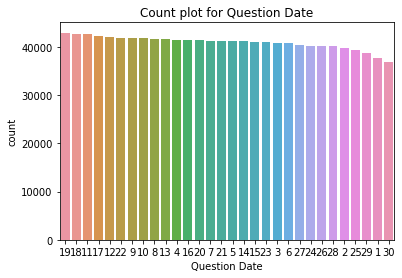

15    0.058478
14    0.058243
13    0.055437
16    0.053947
10    0.052704
12    0.051807
9     0.051779
11    0.051238
17    0.049930
18    0.048509
19    0.047211
20    0.045118
8     0.043365
21    0.041229
7     0.040717
6     0.036496
22    0.034911
5     0.029840
23    0.029188
4     0.025234
0     0.024893
3     0.023530
1     0.023190
2     0.023008
Name: CreationDate_hr, dtype: float64


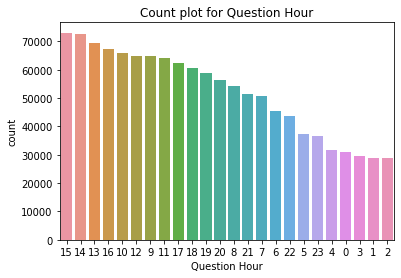

In [ ]:
# DateTime Variables
dateTimeVariables = {"CreationDate_year":"Question Year",
                      "CreationDate_month":"Question Month",
                      "CreationDate_day":"Question Day",
                      "CreationDate_date":"Question Date",
                     "CreationDate_hr":"Question Hour"}

for col,name in dateTimeVariables.items():
  univariateCategorical(questions,col,name,limit=30)

#### Analysis

**Question Year**

There has been a steady increase in number of questions asked with every year.

**Question Month**

Number of questions asked in every month is about the same with a drop in holiday months (november to january).

**Question Day**

Number of questions asked on each weekday is approximately the same with a drop on weekends (Saturday and Sunday).

**Question Date**

Maximum questions are being asked between the 15th and 20th of a month, on average. Minimum number of questions were asked at the start and the end of a month.

**Question Hour**

Maximum questions were asked between 12 Noon - 4 PM (UTC). Number of questions dropped sharply from 12 midnight to 4 AM (UTC).

### Answers Dataset

In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 10 columns):
Id                    int64
OwnerUserId           int64
ParentId              int64
Score                 int64
Score_std             float64
CreationDate_hr       int64
CreationDate_day      object
CreationDate_month    int64
CreationDate_year     int64
CreationDate_date     int64
dtypes: float64(1), int64(8), object(1)
memory usage: 168.0+ MB


#### Numerical Variables

UNIVARIATE ANALYSIS OF Answer Score
Description:
count    2.001316e+06
mean     2.479975e+00
std      1.592961e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.718000e+03
Name: Score, dtype: float64


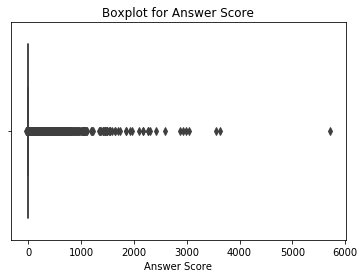

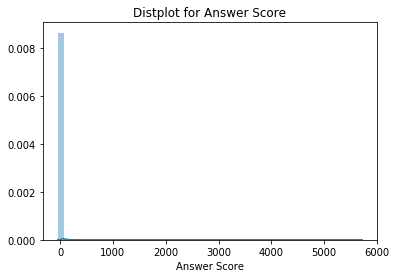

In [ ]:
# Numerical Variables
# Use non-std columns for univariate analysis
numericalVariables = {"Score":"Answer Score"}

for col,name in numericalVariables.items():
  univariateNumerical(answers,col,name)

#### Analysis

Similar to questions, most answers have a score between 0 to 2. The data is right skewed. The main difference between questions score and answers score is that the mean score for answers is slightly higher. The data is right skewed.

#### DataType Variables

In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 10 columns):
Id                    int64
OwnerUserId           int64
ParentId              int64
Score                 int64
Score_std             float64
CreationDate_hr       int64
CreationDate_day      object
CreationDate_month    int64
CreationDate_year     int64
CreationDate_date     int64
dtypes: float64(1), int64(8), object(1)
memory usage: 168.0+ MB


2013    0.165885
2014    0.160921
2015    0.159086
2012    0.141956
2016    0.127959
2011    0.113737
2010    0.073587
2009    0.046413
2008    0.010457
Name: CreationDate_year, dtype: float64


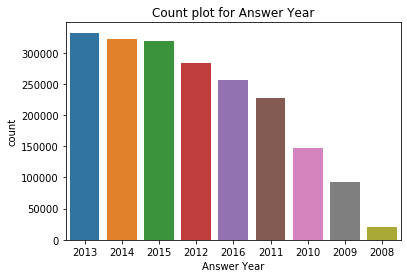

3     0.089658
7     0.087550
8     0.087085
4     0.086568
5     0.085268
9     0.085098
10    0.084843
6     0.082498
1     0.081479
2     0.080976
11    0.075770
12    0.073208
Name: CreationDate_month, dtype: float64


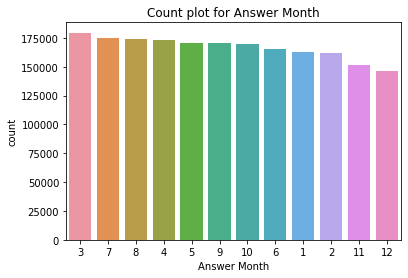

Wednesday    0.175642
Thursday     0.173351
Tuesday      0.172370
Friday       0.158049
Monday       0.153871
Saturday     0.084187
Sunday       0.082530
Name: CreationDate_day, dtype: float64


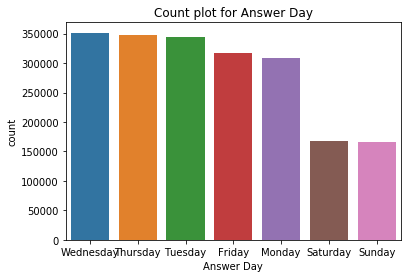

18    0.034069
19    0.033996
11    0.033836
17    0.033725
22    0.033698
10    0.033491
12    0.033464
16    0.033346
9     0.033319
13    0.033239
4     0.033166
8     0.033129
5     0.033028
7     0.032968
20    0.032921
14    0.032903
23    0.032868
3     0.032845
21    0.032836
15    0.032795
6     0.032664
24    0.032571
27    0.032482
28    0.032294
26    0.032156
2     0.031892
25    0.031770
29    0.030998
1     0.030270
30    0.029684
31    0.017579
Name: CreationDate_date, dtype: float64


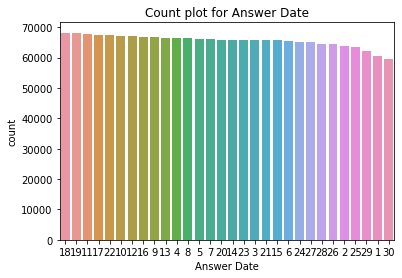

14    0.058068
15    0.057842
13    0.056167
16    0.053667
12    0.052384
17    0.050373
10    0.049904
9     0.049764
11    0.049562
18    0.048995
19    0.048256
20    0.047183
8     0.043548
21    0.043443
7     0.040526
22    0.036129
6     0.035529
23    0.029842
5     0.029435
4     0.025271
0     0.025242
1     0.023140
3     0.022934
2     0.022796
Name: CreationDate_hr, dtype: float64


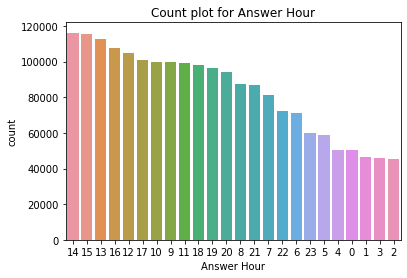

In [ ]:
dataTypeVariables = {"CreationDate_year":"Answer Year",
                      "CreationDate_month":"Answer Month",
                      "CreationDate_day":"Answer Day",
                      "CreationDate_date":"Answer Date",
                     "CreationDate_hr":"Answer Hour"}

for col,name in dataTypeVariables.items():
  univariateCategorical(answers,col,name,limit=30)

#### Analysis

**Answer Year**

Surprisingly, the number of answers on Stack Overflow have decreased from 2013 onwards, whereas the number of questions have increased.

**Answer Month/Day/Date/Hour**

In other aspects, the answer count follows a similar trend as questions showing a general activity of users on the platform.

### Tags Dataset

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750993 entries, 0 to 3750993
Data columns (total 2 columns):
Id     int64
Tag    object
dtypes: int64(1), object(1)
memory usage: 85.9+ MB


#### Categorical Variables

javascript         3.309924e-02
java               3.071507e-02
c#                 2.697579e-02
php                2.634182e-02
android            2.416933e-02
                       ...     
darcs              2.665961e-07
carmine            2.665961e-07
safe-bool-idiom    2.665961e-07
macropy            2.665961e-07
modelvisual3d      2.665961e-07
Name: Tag, Length: 37035, dtype: float64


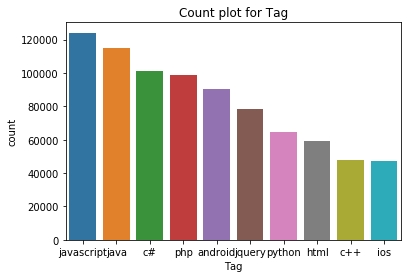

In [ ]:
categoricalVariables = {"Tag":"Tag"}

for col,name in categoricalVariables.items():
  univariateCategorical(tags,col,name,limit=10)

#### Analysis

**Top 10 Common Tags**

This information answers the following question:

> Let’s say Stack Overflow also wants to post some details on its job website to help various employees understand the subjects or topics trending in the industry.

The top 10 most commonly used tags are:

1. Javascript
2. Java
3. C#
4. PHP
5. Android
6. JQuery
7. Python
8. HTML
9. C++
10. iOS

Out of these, JavaScript, HTML, JQuery, C# and PHP are commonly used in web related development. 

Java, Android and iOS are used for mobile app development.

Other languages are used for core software development with Python used even in Data Science.

Thus, the following are the trending subjects:

1. Web development
2. Mobile App Development
3. Software Development & Data Science

### Users Dataset

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 8 columns):
id                  465460 non-null int64
display_name        465460 non-null object
last_access_date    465460 non-null datetime64[ns, UTC]
reputation          465460 non-null int64
views               465460 non-null int64
reputation_std      465460 non-null float64
views_std           465460 non-null float64
ActiveLastYear      465460 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(1)
memory usage: 32.0+ MB


#### Numerical Analysis

UNIVARIATE ANALYSIS OF User Reputation
Description:
count    4.654600e+05
mean     1.977049e+03
std      1.098895e+04
min      1.000000e+00
25%      6.600000e+01
50%      3.530000e+02
75%      1.165000e+03
max      1.128126e+06
Name: reputation, dtype: float64


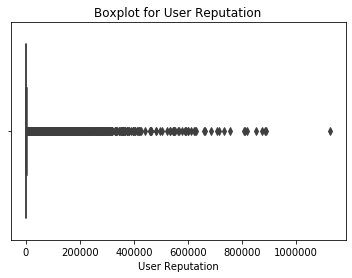

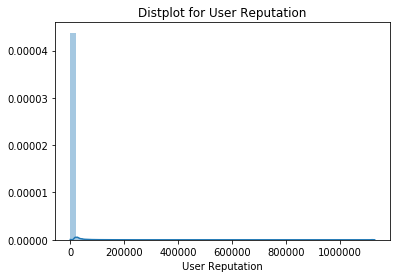

UNIVARIATE ANALYSIS OF views
Description:
count    4.654600e+05
mean     2.400751e+02
std      3.396432e+03
min      0.000000e+00
25%      1.200000e+01
50%      4.500000e+01
75%      1.440000e+02
max      1.835157e+06
Name: views, dtype: float64


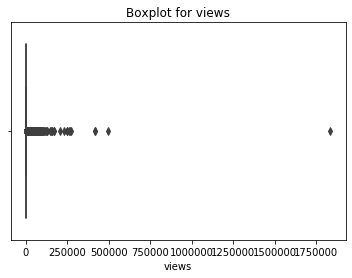

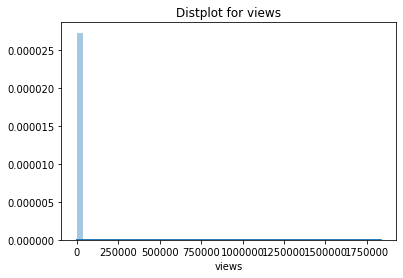

In [ ]:
numericalVariables = {"reputation":"User Reputation",
                      "views":"views"}

for col,name in numericalVariables.items():
  univariateNumerical(users,col,name)

#### Analysis

**User Reputation**

As expected, user reputation (and views) have a right skewed data. Around 50% users have reputation within 350 but because of the very high reputation of some users, the average reputation has shot up.

**User Views**

User views practically is not going to be much useful for us. Analytically also, except a very few high user views, the views for 75% users is within 100.

In [ ]:
# Drop views and views_std
users.drop(["views","views_std"],axis=1,inplace=True)

#### Categorical Variables

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 6 columns):
id                  465460 non-null int64
display_name        465460 non-null object
last_access_date    465460 non-null datetime64[ns, UTC]
reputation          465460 non-null int64
reputation_std      465460 non-null float64
ActiveLastYear      465460 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 24.9+ MB


1    0.610628
0    0.389372
Name: ActiveLastYear, dtype: float64


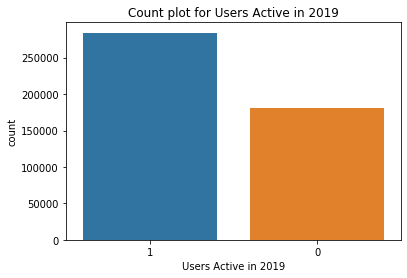

In [ ]:
categoricalVariables = {"ActiveLastYear":"Users Active in 2019"}

for col,name in categoricalVariables.items():
  univariateCategorical(users,col,name,limit=10)

#### Analysis

As could be expected, only around 61% of the total users were active in 2019. While sending notifications to users about new questions, we will only consider these users.

## Segmented Univariate Analysis

### User Recommendation for Data Science Problems

The first problem that we will try to solve using segmented univariate analysis, takes into account the users who have answered data science tagged questions and were active in 2019.

First, let's find the questions that had data science tags.

In [ ]:
DS_Tag_questions = questions[questions["DS_Tag"]==1]

In [ ]:
DS_Tag_questions.shape

(130710, 28)

There are 130K questions having at least one of the 6 data science tags. Now, let's find the answers to these questions.

In [ ]:
answers.head()

,Id,OwnerUserId,ParentId,Score,Score_std,CreationDate_hr,CreationDate_day,CreationDate_month,CreationDate_year,CreationDate_date
0,92,61,90,13,0.660407,14,Friday,8,2008,1
1,124,26,80,12,0.597631,16,Friday,8,2008,1
2,199,50,180,1,-0.092907,19,Friday,8,2008,1
3,269,91,260,4,0.095421,23,Friday,8,2008,1
4,307,49,260,28,1.602050,1,Saturday,8,2008,2


In [ ]:
# Question IDs of Data Science tagged questions
questionIds_DS = DS_Tag_questions["Id"].values

# Answers of the above questions
answers_DS = answers[answers["ParentId"].isin(questionIds_DS)]

In [ ]:
answers_DS.shape

(212133, 10)

There are approximately 212K answers to the Data Science tagged questions. Now, let's find the users who answered these questions.

In [ ]:
userId_answers_DS = answers_DS["OwnerUserId"].values

In [ ]:
# Get unique user Ids
userId_answers_DS = np.unique(userId_answers_DS)

In [ ]:
len(userId_answers_DS)

71422

There are 71.4K users who answered the Data Science tagged questions. Let's now keep only the users who were also active in 2019.

In [ ]:
# Users who answered DS questions
users_answers_DS = users[users["id"].isin(userId_answers_DS)]

In [ ]:
# Keep only the users who were active in 2019
users_answers_DS = users_answers_DS[users_answers_DS["ActiveLastYear"]==1]

In [ ]:
users_answers_DS.shape

(50262, 6)

Out of the 71.4K users we obtained before, only ~50K were active in 2019. Let's now sort them based on their reputation and last access date.

In [ ]:
DS_Recommendations = users_answers_DS.sort_values(by=["reputation","last_access_date"],ascending=False)["display_name"]

In [ ]:
DS_Recommendations = DS_Recommendations.values

In [ ]:
# Keep only top 20 recommendations
DS_Recommendations = DS_Recommendations[:20]

In [ ]:
DS_Recommendations

array(['Jon Skeet', 'VonC', 'BalusC', 'Darin Dimitrov', 'Gordon Linoff',
       'Marc Gravell', 'Hans Passant', 'CommonsWare', 'Martijn Pieters',
       'T.J. Crowder', 'SLaks', 'Greg Hewgill', 'Quentin', 'paxdiablo',
       'Alex Martelli', 'dasblinkenlight', 'CMS', 'Mark Byers',
       'Ignacio Vazquez-Abrams', 'marc_s'], dtype=object)

We can notify the following 20 users whenever there is a Data Science tagged question. These users have the highest reputation and were most recently active among those who answered the data science tagged questions.

1. Jon Skeet
2. VonC
3. BalusC
4. Darin Dimitrov
5. Gordon Linoff
6. Marc Gravell
7. Hans Passant
8. CommonsWare
9. Martijn Pieters
10. T.J. Crowder
11. SLaks
12. Greg Hewgill
13. Quentin
14. paxdiablo
15. Alex Martelli
16. dasblinkenlight
17. CMS
18. Mark Byers
19. Ignacio Vazquez-Abrams
20. marc_s

### Time to answer v/s Data Science Tags

Now, let's try to solve the problem 2:

> When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

For this, we will analyse the following:
1. Time to answer a question, based on the data science tag used.

Next, we will also try to solve the problem 3:

> While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.

For this, we will analyse the following:

1. Time to answer a question, based on whether `<code>` tag was used or not.
2. Time to answer a question, based on the week day the question was posted.
3. Time to answer a question, based on the hour the question was posted.

In [ ]:
# Select questions with data science tag
DS_Tag_questions = questions[questions["DS_Tag"]==1]

In [ ]:
DS_Tag_questions.head()

,Id,OwnerUserId,Score,Closed,Score_std,timeToAnswer,timeToAnswer_std,DS_Tag,python,r,matlab,sas,excel,sql,Title_length,Body_length,Title_length_std,Body_length_std,Code,Num_Tags,Tag_present,CreationDate_hr,CreationDate_day,CreationDate_month,CreationDate_year,CreationDate_date,Num_answers,Num_answers_std
2,120,83,21,0,1.408583,1278.850833,-0.128455,1,0,0,0,0,0,1,17,431,-1.755007,-0.524613,1,3,1,15,Friday,8,2008,1,1,-0.391091
22,1970,116,10,0,0.602833,0.066389,-0.313001,1,0,0,0,0,0,1,71,134,0.971260,-0.683319,0,5,1,6,Tuesday,8,2008,5,7,3.675896
23,2120,383,77,0,5.510582,2.625000,-0.312632,1,0,0,0,0,0,1,28,563,-1.199657,-0.454077,1,2,1,11,Tuesday,8,2008,5,7,3.675896
33,2840,383,32,0,2.214333,0.039167,-0.313005,1,0,0,0,0,0,1,30,409,-1.098684,-0.536369,0,3,1,20,Tuesday,8,2008,5,6,2.998065
46,4110,369,7,1,0.383083,0.158611,-0.312988,1,0,0,0,0,0,1,72,369,1.021747,-0.557743,0,4,1,23,Wednesday,8,2008,6,5,2.320233


In [ ]:
# Data Science Tags
DS_tags = ["python","r","matlab","sas","excel","sql"]
for DS_tag in DS_tags:
  print("Tag: {}".format(DS_tag))
  print(DS_Tag_questions[DS_Tag_questions[DS_tag]==1]["timeToAnswer"].describe())
  print("----------------------------------")

Tag: python
count    63945.000000
mean      1641.110896
std       5656.582919
min        -22.977222
25%          0.116111
50%          0.460556
75%         10.506667
max      71172.881667
Name: timeToAnswer, dtype: float64
----------------------------------
Tag: r
count    15609.000000
mean      1955.430881
std       5678.362249
min        -18.450556
25%          0.218889
50%          0.801667
75%         21.152778
max      63476.325833
Name: timeToAnswer, dtype: float64
----------------------------------
Tag: matlab
count     6441.000000
mean      2245.372775
std       6556.443368
min        -15.382222
25%          0.241944
50%          1.022500
75%         17.511111
max      59912.915278
Name: timeToAnswer, dtype: float64
----------------------------------
Tag: sas
count      690.000000
mean      1055.950224
std       4388.653625
min        -21.596389
25%          0.443403
50%          1.501667
75%          6.509097
max      38671.078611
Name: timeToAnswer, dtype: float64
-----------

Since we know we are dealing with highly skewed data, instead of going for mean, let's focus on 50% and 75% quantiles. 50% quantile will serve as the expected value whereas 75% can serve as a safe value.


| Tag | Average time to answer | Safe Estimate |
| --- | --- | --- |
| SQL | 12 minutes | 56 minutes |
| Excel | 56 minutes | 18.5 hours |
| SAS | 1.5 hours | 6.5 hours |
| MATLAB | 1.0 hours | 17.5 hours |
| R | 48 minutes | 21.15 hours |
| Python | 28 minutes | 10.5 hours |


### Time to answer v/s `<code>` Tag

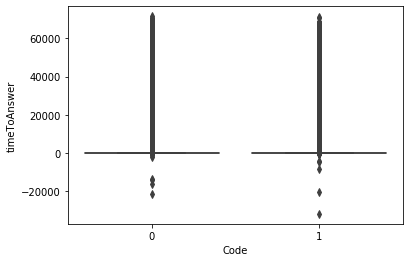

In [ ]:
sns.boxplot(x="Code",y="timeToAnswer",data=questions)
plt.show()

The boxplot is not able to reveal much information because of skewed data. Let's try a table.

In [ ]:
questions.groupby("Code")["timeToAnswer"].describe()

,count,mean,std,min,25%,50%,75%,max
Code,,,,,,,,
0,325267.0,2571.366626,7823.128720,-21368.250000,0.163333,1.200278,77.380833,71583.231111
1,924495.0,2027.386468,6580.284031,-31896.541944,0.129722,0.565278,18.080972,71172.881667


As we can see, questions which have code present in their body are answered much sooner than questions without code. This verifies our previous remark reagarding the same.

### Time to answer v/s week day

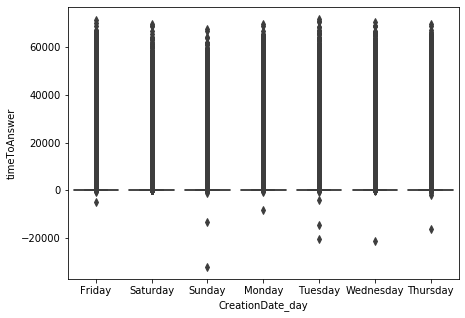

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="CreationDate_day",y="timeToAnswer",data=questions)
plt.show()

As before, because of skewed data, the boxplot is not able to provide much information. Let's move back to the table.

In [ ]:
questions.groupby("CreationDate_day")["timeToAnswer"].describe()

,count,mean,std,min,25%,50%,75%,max
CreationDate_day,,,,,,,,
Friday,192930.0,2188.146879,6971.261965,-4924.563611,0.133889,0.650694,39.897083,71172.881667
Monday,196532.0,2222.194347,7004.250012,-8127.855556,0.135000,0.670556,24.193542,69577.263889
Saturday,105536.0,2051.404084,6751.830192,-15.354167,0.148611,0.728333,25.039861,69628.381389
Sunday,105725.0,2024.177610,6654.570211,-31896.541944,0.146389,0.699722,19.158889,67429.744167
Thursday,215575.0,2195.504009,6977.887178,-16299.907778,0.135278,0.656944,23.881806,69674.103889
Tuesday,214364.0,2192.240691,6970.005257,-20256.587778,0.134444,0.646111,22.540208,71583.231111
Wednesday,219100.0,2181.932749,6949.970667,-21368.250000,0.134167,0.654444,23.135347,70541.854167


We will again use 50% quantile as the estimate and 75% as the safe estimate.

| Week day | Estimated time to answer | Safe estimate |
| --- | --- | --- |
| Monday | 40 minutes | 24.2 hours |
| Tuesday | 39 minutes | 23.89 hours |
| Wednesday | 39 minutes | 23.13 hours |
| Thursday | 40 minutes | 23.89 hours |
| Friday | 39 minutes | 39.90 hours |
| Saturday | 44 minutes | 25 hours |
| Sunday | 42 minutes | 19.16 hours |

From the above data, we can say that it's recommended to ask questions on Monday to Thursday.

### Time to answer v/s hour

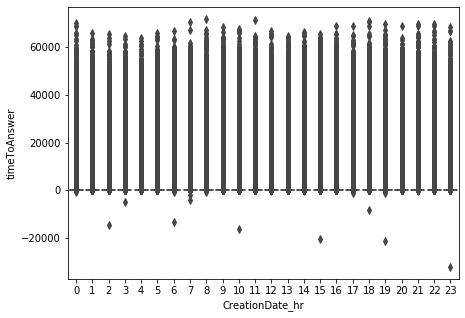

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="CreationDate_hr",y="timeToAnswer",data=questions)
plt.show()

As before, because of skewed data, the boxplot is not able to provide much information. Let's move back to the table.

In [ ]:
questions.groupby("CreationDate_hr")["timeToAnswer"].describe().sort_values(by=["50%","75%"])

,count,mean,std,min,25%,50%,75%,max
CreationDate_hr,,,,,,,,
19,59002.0,2088.440819,6866.040188,-21368.250000,0.125278,0.562500,19.975694,69628.381389
20,56387.0,2074.595793,6775.433139,-20.986944,0.126389,0.566111,20.341250,68691.526389
14,72790.0,2191.415261,6931.508351,-215.590278,0.127500,0.590000,26.606944,66129.582222
18,60625.0,2114.850975,6838.214121,-8127.855556,0.126944,0.594167,20.911944,70733.923333
13,69283.0,2234.058248,7008.658976,-36.063056,0.127500,0.595556,27.417361,64474.568056
15,73084.0,2152.116437,6859.217682,-20256.587778,0.128056,0.607778,26.998750,65528.148611
12,64746.0,2216.059706,6915.406960,-52.309444,0.130000,0.612222,27.068125,66611.200278
17,62400.0,2132.805213,6848.161307,-1083.366111,0.129722,0.615278,23.045833,68694.650278
21,51526.0,2085.740891,6843.628671,-69.643611,0.130556,0.619444,21.619514,69674.103889


From the above information, we can see that it's recommended to ask questions between 12 PM - 9 PM (UTC) as most questions asked in this time are answered the quickest.

### Time to answer v/s Tag Presence

In [ ]:
questions.groupby("Tag_present")["timeToAnswer"].describe()

,count,mean,std,min,25%,50%,75%,max
Tag_present,,,,,,,,
0,2.0,31.375833,44.113249,0.183056,15.779444,31.375833,46.972222,62.568611
1,1249760.0,2168.967881,6929.369209,-31896.541944,0.136667,0.665833,23.934722,71583.231111


Since the number of questions with no tags was just 2 and one of which took around 62.6 hours to get the first answer, it's recommended to use a tag in the question.

On average, a question with at least one tag gets answered within 40 minutes and within 24 hours (on a safer side).

## Bivariate & Multivariate Analysis

In the next analysis, we will analyse the following:

1. Title length versus number of answers
2. Body length versus number of answers
3. Title length versus time to answer
4. Body length versus time to answer

The above can be clubbed to form a multivariate analysis:

`[title length, body length, time to answer, number of answers]` (**Heatmap**)

Using this analysis, we can provide suggestions to users regarding what should be the title length they should keep, what should be the body length, number of tags they should provide to receive maximum answers in minimum time.

Since this time we will be taking into account multiple numerical variables, we will use standardized version of the variables so that range of variables does not become an issue.

The intention is to come up with suggestions rather than numerical estimates.

We will also look more deeply into effect of hour and weekday on time to answer, and finding out what's the optimal time to post a question for every week day.

7. Time to answer versus week day versus hour

This can be carried out using **pivot table**

### Heatmap

In [ ]:
questions.head(1)

,Id,OwnerUserId,Score,Closed,Score_std,timeToAnswer,timeToAnswer_std,DS_Tag,python,r,matlab,sas,excel,sql,Title_length,Body_length,Title_length_std,Body_length_std,Code,Num_Tags,Tag_present,CreationDate_hr,CreationDate_day,CreationDate_month,CreationDate_year,CreationDate_date,Num_answers,Num_answers_std
0,80,26,26,0,1.774833,2.211111,-0.312692,0,0,0,0,0,0,0,58,1941,0.314937,0.282278,1,3,1,13,Friday,8,2008,1,3,0.964571


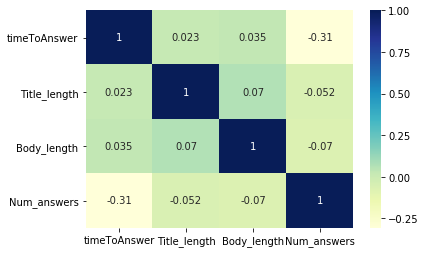

In [ ]:
# Define columns on which we want to carry analysis
columns = ["timeToAnswer","Title_length","Body_length","Num_answers"]

# Pairplot
sns.heatmap(questions[columns].corr(),annot=True, cmap="YlGnBu")
plt.show()

### Analysis

Since we are dealing with highly skewed data, we will take into account even the smallest correlation values. We can draw the following conclusions from the above heatmap:

1. As the time to answer increases, the number of answers also decreases. This makes sense as the older questions get pushed down by the newer questions.
2. As the body length increases, time to answer increases. This makes sense as longer questions are more probable to be ignored.
3. As the title length increases, time to answer increases. That's why a recommended approach is to keep the title short and to the point.
4. Title length and body length have a stronger positive correlation meaning that the questions which tend to have longer titles, also tend to have a longer body.
5. Both title length and body length have a negative correlation with number of answers, which is expected.

### Pivot Table

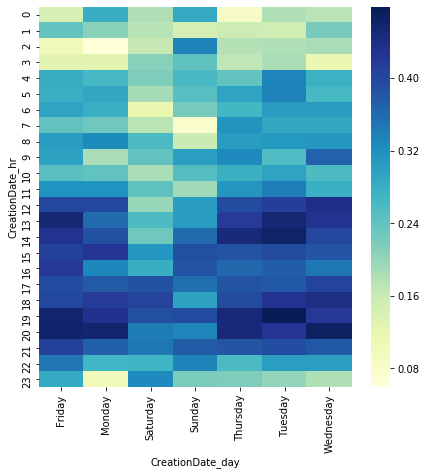

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(1-pd.pivot_table(data=questions,values="timeToAnswer",
               index="CreationDate_hr",columns="CreationDate_day",
               aggfunc="median"),cmap="YlGnBu")

In [ ]:
pd.pivot_table(data=questions,values="timeToAnswer",
               index="CreationDate_hr",columns="CreationDate_day",
               aggfunc="median")[["Monday","Tuesday","Wednesday",
                                  "Thursday","Friday","Saturday","Sunday"]]

CreationDate_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
CreationDate_hr,,,,,,,
0,0.719861,0.819583,0.825139,0.913611,0.856389,0.816944,0.712222
1,0.790278,0.850139,0.777500,0.843194,0.760278,0.823333,0.852778
2,0.940833,0.818611,0.813333,0.821667,0.895833,0.834444,0.664167
3,0.874722,0.814861,0.882778,0.830000,0.874722,0.789722,0.756111
4,0.735694,0.666389,0.724167,0.760278,0.717500,0.782778,0.737500
5,0.710833,0.663472,0.736111,0.706667,0.720278,0.810833,0.750278
6,0.721111,0.694722,0.694306,0.733889,0.704167,0.882222,0.774444
7,0.770417,0.710556,0.711389,0.684861,0.758611,0.827778,0.923889
8,0.673472,0.691944,0.688056,0.694722,0.694028,0.739583,0.842500


### Analysis

From the above data, we can see that the recommended hours day wise are as follows:

| Day | Recommended Time (UTC) | Expected time to answer |
| --- | --- | --- |
| Monday | 2 PM - 3 PM, 5 PM - 8 PM | 35 minutes |
| Tuesday | 1 PM - 2 PM, 6 PM - 8 PM | 33 minutes |
| Wednesday | 12 PM - 1 PM, 5 PM - 8 PM | 34 minutes |
| Thursday | 1 PM - 2 PM, 7 PM - 8 PM | 33 minutes |
| Friday | 12 PM - 9 PM | 35 minutes |
| Saturday | 5 PM - 7 PM | 36 minutes |
| Sunday | 3 PM - 4 PM, 7 PM, 9 PM | 36 minutes |

## EDA Summary

Let's focus only on the important information received by the EDA we have carried out so far.

### Problem 1

> When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.

We can notify the following 20 users whenever there is a Data Science tagged question. These users have the highest reputation and were most recently active among those who answered the data science tagged questions.

1. Jon Skeet
2. VonC
3. BalusC
4. Darin Dimitrov
5. Gordon Linoff
6. Marc Gravell
7. Hans Passant
8. CommonsWare
9. Martijn Pieters
10. T.J. Crowder
11. SLaks
12. Greg Hewgill
13. Quentin
14. paxdiablo
15. Alex Martelli
16. dasblinkenlight
17. CMS
18. Mark Byers
19. Ignacio Vazquez-Abrams
20. marc_s

### Problem 2

> When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

| Tag | Average time to answer | Safe Estimate |
| --- | --- | --- |
| SQL | 12 minutes | 56 minutes |
| Excel | 56 minutes | 18.5 hours |
| SAS | 1.5 hours | 6.5 hours |
| MATLAB | 1.0 hours | 17.5 hours |
| R | 48 minutes | 21.15 hours |
| Python | 28 minutes | 10.5 hours |

### Problem 3

> While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.

1. Provide 3 or 4 relevant tags to the question.
2. Provide code in the question body using `<code>` tag.
3. It's recommended to ask question on Monday to Thursday.
4. Ask question between 12 PM - 9 PM (UTC) to receive a reply in minimum time.
5. Keep the question title short and to the point. The average length should be around 50 characters.
6. Keep the question body to the point. The length should be between 500 to 1500 characters.
7. Based on week day, recommended time to ask a question is as follows:

| Day | Recommended Time (UTC) | Expected time to answer |
| --- | --- | --- |
| Monday | 2 PM - 3 PM, 5 PM - 8 PM | 35 minutes |
| Tuesday | 1 PM - 2 PM, 6 PM - 8 PM | 33 minutes |
| Wednesday | 12 PM - 1 PM, 5 PM - 8 PM | 34 minutes |
| Thursday | 1 PM - 2 PM, 7 PM - 8 PM | 33 minutes |
| Friday | 12 PM - 9 PM | 35 minutes |
| Saturday | 5 PM - 7 PM | 36 minutes |
| Sunday | 3 PM - 4 PM, 7 PM, 9 PM | 36 minutes |

### Problem 4

> Let’s say Stack Overflow also wants to post some details on its job website to help various employees understand the subjects or topics trending in the industry.

The top 10 most commonly used tags are:

1. Javascript
2. Java
3. C#
4. PHP
5. Android
6. JQuery
7. Python
8. HTML
9. C++
10. iOS

Out of these, JavaScript, HTML, JQuery, C# and PHP are commonly used in web related development. 

Java, Android and iOS are used for mobile app development.

Other languages are used for core software development with Python used even in Data Science.

Thus, the following are the trending subjects:

1. Web development
2. Mobile App Development
3. Software Development & Data Science